# FastAI :


Fastai is an open-source deep learning library designed to make it easier for both beginners and experienced practitioners to build and train high-quality machine learning models. It provides a high-level API that simplifies the process of creating complex neural networks and applying them to various tasks.

In [1]:
import fastbook
fastbook.setup_book()

%autoreload 2
%matplotlib inline
%reload_ext autoreload

In [2]:
from fastai.vision.all import *                                             #importing all libraries from fastai
PATH = untar_data(URLs.CAMVID_TINY)                                         #path to dataset

# Semantic Segmentation :

Semantic segmentation is a computer vision task where the goal is to label each pixel in an image with the category it belongs to. It's like coloring a black and white picture where each color represents a different object or region. This task is used to understand and analyze images in detail, enabling applications like identifying objects in scenes, autonomous driving, medical image analysis, and more. It involves pixel-level classification, doesn't distinguish between instances of the same class, and is crucial for tasks requiring fine-grained image understanding. Here's how you can do it:



We need a dataset with images and their corresponding pixel-wise labels. Fastai's SegDataLoaders can be used to load and preprocess this data.

path = untar_data(URLs.CAMVID_TINY)


Load the images and labels into a DataLoaders object.

dls = SegmentationDataLoaders.from_label_func(                              
      PATH,                                                                 
      bs=8,                                                                 
      fnames = get_image_files(PATH/"images"),                              
      label_func=lambda o: PATH/"labels"/f"{o.stem}_P{o.suffix}",           
      codes=np.loadtxt(PATH/"codes.txt", dtype=str)) 
      
      
Choose a segmentation architecture. Fastai provides several pre-defined architectures that you can use.

learn = unet_learner(dls, resnet34)                                         

learn.fine_tune(4) 



Use the trained model to make predictions and visualize the segmentation masks.

learn.show_results (max_n = 3, figsize = (8, 8))  

In [5]:
dls = SegmentationDataLoaders.from_label_func(                              #dataloader for semantic segmentation           
      PATH,                                                                 #path to data directory
      bs=8,                                                                 #batch size
      fnames = get_image_files(PATH/"images"),                              #getting image file path
      label_func=lambda o: PATH/"labels"/f"{o.stem}_P{o.suffix}",           #lambda function to generate label path
      codes=np.loadtxt(PATH/"codes.txt", dtype=str))                        #load class code from "code.txt"

In [6]:
learn = unet_learner(dls, resnet34)                                         #initializing resnet34 pretrained mmodel  

learn.fine_tune(4)                                                          #training for 4 eochs 

E:\Anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
E:\Anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\DELL/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:30<00:00, 2.86MB/s]


epoch,train_loss,valid_loss,time
0,3.008754,2.425700,01:58


epoch,train_loss,valid_loss,time
0,1.749041,1.411616,02:33
1,1.569531,1.209623,02:58
2,1.387231,0.999991,01:45
3,1.239923,0.960208,01:49


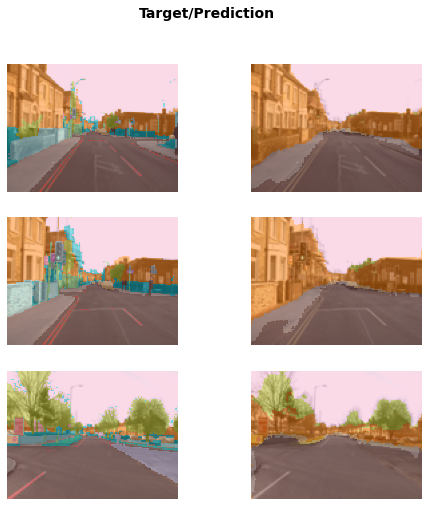

In [10]:
learn.show_results (max_n = 3, figsize = (8, 8))                                 #viewing the segmented image results